# Spherical Gaussian experiment: generative results

## Setup

In [1]:
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging
import corner

sys.path.append("../../")

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [51]:
algo_filenames = [
    "flow", "flow", "flow", "flow", 
    "pie", "pie", "pie", "pie", 
    "mf", "slice",
    "gamf", "gamf", "gamf", "gamf", "gamf",
    "hybrid",
    "mf_specified", "pie_specified"
]
algo_additionals = [
    "", "_long", "_long_shallow", "_long_deep",
    "", "_long", "_long_shallow", "_long_deep",
    "",
    "", 
    "", "_long_simple", "_long", "_long_shallow", "_long_deep",
    "", 
    "", ""
]
algo_labels = [
    "Flow (short)", "Flow (long)", "Flow (long, shallow)", "Flow (long, deep)",
    "PIE (short)", "PIE (long)", "PIE (long, shallow)", "PIE (long, deep)",
    "Manifold flow (short, simple)",
    "Slice (short, simple)",
    "GAMF (short, simple)", "GAMF (long, simple)", "GAMF (long)", "GAMF (long, shallow)", "GAMF (long, deep)",
    "Hybrid (short, simple)",
    "Specified MF (short)", "Specified PIE (short)"
]
algo_colors = ["C0"]*4 + ["C1"]*4 + ["C2", "C3"] + ["C4"]*5 + ["C6", "C7", "C8"]
algo_markers = ["o", "s", "^", "P"]*2 + ["o"]*2 + ["o", "s", "^", "P", "x"] + ["o", "*", "*"]

setup_filenames = [
    "2_3_0.010",
    "2_3_0.001",
    "2_3_0.100",
]
setup_labels = [
    r"2-sphere in 3 dim., $\epsilon = 0.01$",
    r"2-sphere in 3 dim., $\epsilon = 0.001$",
    r"2-sphere in 3 dim., $\epsilon = 0.1$",
]


In [44]:
result_dir = "../data/results"

x_gen = []
logp_gen = []
distance_gen = []

for algo_filename, algo_add in zip(algo_filenames, algo_additionals):
    x_gen_ = []
    logp_gen_ = []
    distance_gen_ = []
    for setup_filename in setup_filenames:
        try:
            x_gen_.append(np.load(
                "{}/{}_2_spherical_gaussian_{}{}_samples.npy".format(result_dir, algo_filename, setup_filename, algo_add)
            ))
        except FileNotFoundError as e:
            print(e)
            x_gen_.append(None)
            
        try:
            logp_gen_.append(np.load(
                "{}/{}_2_spherical_gaussian_{}{}_samples_likelihood.npy".format(result_dir, algo_filename, setup_filename, algo_add)
            ))
        except:
            logp_gen_.append(np.nan*np.ones(1000))
            
        try:
            distance_gen_.append(np.load(
                "{}/{}_2_spherical_gaussian_{}{}_samples_manifold_distance.npy".format(result_dir, algo_filename, setup_filename, algo_add)
            ))
        except:
            distance_gen_.append(np.nan*np.ones(1000))
            
    x_gen.append(x_gen_)
    logp_gen.append(logp_gen_)
    distance_gen.append(distance_gen_)
    
logp_gen = np.asarray(logp_gen)
distance_gen = np.asarray(distance_gen)


[Errno 2] No such file or directory: '../data/results/flow_2_spherical_gaussian_2_3_0.001_long_samples.npy'
[Errno 2] No such file or directory: '../data/results/flow_2_spherical_gaussian_2_3_0.100_long_samples.npy'
[Errno 2] No such file or directory: '../data/results/flow_2_spherical_gaussian_2_3_0.001_long_shallow_samples.npy'
[Errno 2] No such file or directory: '../data/results/flow_2_spherical_gaussian_2_3_0.100_long_shallow_samples.npy'
[Errno 2] No such file or directory: '../data/results/flow_2_spherical_gaussian_2_3_0.001_long_deep_samples.npy'
[Errno 2] No such file or directory: '../data/results/flow_2_spherical_gaussian_2_3_0.100_long_deep_samples.npy'
[Errno 2] No such file or directory: '../data/results/pie_2_spherical_gaussian_2_3_0.001_long_samples.npy'
[Errno 2] No such file or directory: '../data/results/pie_2_spherical_gaussian_2_3_0.100_long_samples.npy'
[Errno 2] No such file or directory: '../data/results/pie_2_spherical_gaussian_2_3_0.001_long_shallow_samples.np

In [46]:
min_logp = -100.
max_distance = 1.

mean_logp_gen = np.mean(np.clip(logp_gen, min_logp, None), axis=2)
mean_distance_gen = np.mean(np.clip(distance_gen, None, max_distance), axis=2)


In [47]:
mean_distance_gen

array([[7.70209569e-01, 8.16578918e-01, 5.80120851e-01],
       [8.09357886e-01,            nan,            nan],
       [6.95447749e-01,            nan,            nan],
       [7.65793012e-01,            nan,            nan],
       [1.59526020e-01, 5.58346291e-01, 1.83742423e-01],
       [9.97065205e-01,            nan,            nan],
       [9.96646314e-01,            nan,            nan],
       [9.82822291e-01,            nan,            nan],
       [6.32709537e-01, 7.34415988e-01, 9.24583904e-01],
       [9.54361269e-01, 8.39455690e-01, 4.82618643e-01],
       [8.36673869e-01, 8.11901422e-01, 6.60358573e-01],
       [9.61603627e-01,            nan,            nan],
       [           nan,            nan,            nan],
       [6.84578784e-01,            nan,            nan],
       [           nan,            nan,            nan],
       [5.58288225e-01, 9.41590491e-01, 3.66089176e-01],
       [1.46031380e-08, 1.43647194e-08, 1.49607658e-08],
       [1.47223473e-08,        

## Plot generated samples

In [67]:
def show_corner(algo=None, show=0, boundary=1.5):
    if algo is None:
        print("Simulator")
        x = np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.010_x_test.npy")
        _ = corner.corner(x, range=[(-boundary, boundary) for _ in range(3)], bins=10)
        
    else:
        print(algo_labels[algo])
        _ = corner.corner(x_gen[algo][show], range=[(-boundary, boundary) for _ in range(3)], bins=10)

Simulator


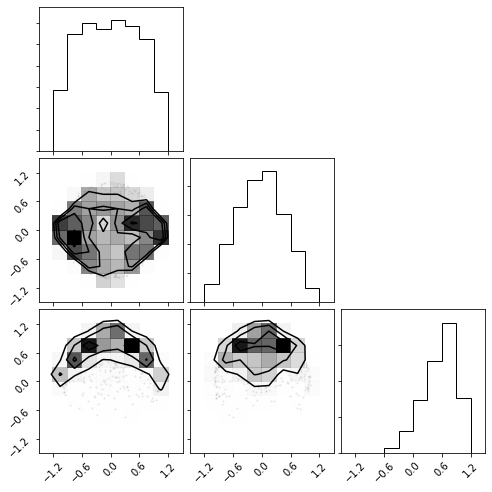

In [68]:
show_corner()

PIE (short)


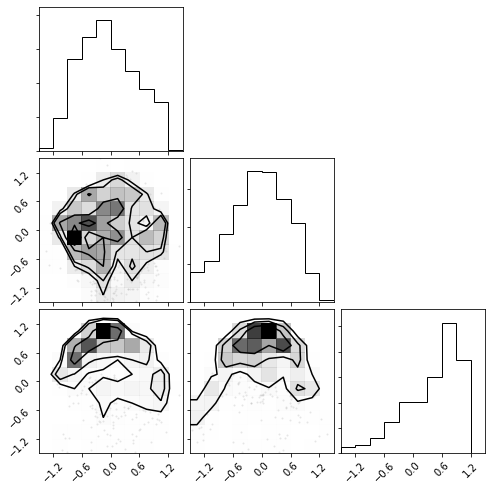

In [69]:
show_corner(4)

GAMF (long, shallow)


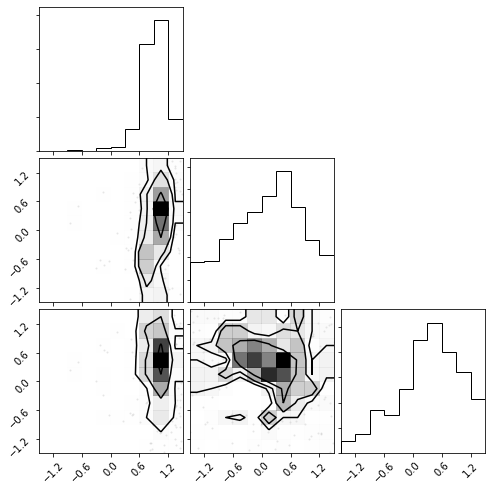

In [71]:
show_corner(-5)

## Plot results

/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


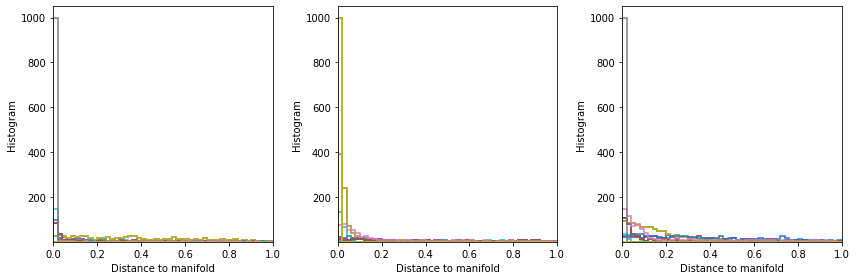

In [40]:
show = [1,0,2]
ncols = 3
nrows = (len(show) - 1) // ncols + 1

xmin, xmax = 0.,1.

fig = plt.figure(figsize=(ncols*4, nrows*4))

for panel, setting in enumerate(show):
    ax = plt.subplot(nrows, ncols, panel + 1)
    
    plt.plot([], [], lw=0., ls=" ", label=setup_labels[setting])
    
    for algo, algo_label in enumerate(algo_labels):
        plt.hist(
            distance_gen[algo, setting,:],
            range=(xmin, xmax), bins=50,
            label=algo_label,
            histtype="step",
            lw=1.5
        )
        
    #plt.legend()

    plt.xlabel(r"Distance to manifold")
    plt.ylabel(r"Histogram")
    plt.xlim(xmin, xmax)
    plt.ylim(1.e-3, None)
    
plt.tight_layout()
plt.savefig("../figures/distance_distribution_spherical_gaussian.pdf")


/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


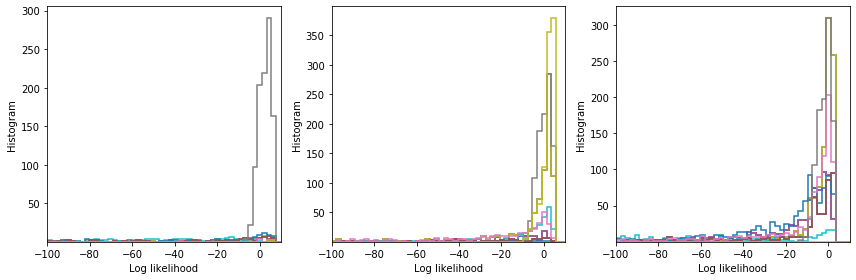

In [41]:
show = [1,0,2]
ncols = 3
nrows = (len(show) - 1) // ncols + 1

xmin, xmax = -100.,10.

fig = plt.figure(figsize=(ncols*4, nrows*4))

for panel, setting in enumerate(show):
    ax = plt.subplot(nrows, ncols, panel + 1)
    
    plt.plot([], [], lw=0., ls=" ", label=setup_labels[setting])
    
    for algo, algo_label in enumerate(algo_labels):
        plt.hist(
            logp_gen[algo, setting,:],
            range=(xmin, xmax), bins=50,
            label=algo_label,
            histtype="step",
            lw=1.5
        )
        
    #plt.legend()

    plt.xlabel(r"Log likelihood")
    plt.ylabel(r"Histogram")
    plt.xlim(xmin, xmax)
    plt.ylim(1.e-3, None)
    
plt.tight_layout()
plt.savefig("../figures/likelihood_distribution_spherical_gaussian.pdf")



15:39 matplotlib.legend              WARNING No handles with labels found to put in legend.


Flow (short) [-98.31787455 -89.83215734 -39.67810841]
Flow (long) [         nan -86.85140435          nan]
Flow (long, shallow) [         nan -89.35147977          nan]
Flow (long, deep) [         nan -66.20575831          nan]
PIE (short) [-98.32626126 -24.03764498  -3.32949699]
PIE (long) [  nan -99.8   nan]
PIE (long, shallow) [         nan -99.89154413          nan]
PIE (long, deep) [         nan -93.28522902          nan]
Manifold flow (short, simple) [-91.93783535 -74.99809202 -87.51789173]
Slice (short, simple) [-92.26647038 -98.59474905 -25.23373091]
GAMF (short, simple) [-94.98212303 -94.43020314 -59.33024121]
GAMF (long, simple) [         nan -97.67540229          nan]
GAMF (long) [nan nan nan]
GAMF (long, shallow) [         nan -90.76779707          nan]
GAMF (long, deep) [nan nan nan]
Hybrid (short, simple) [-99.63676132 -72.22626866 -24.2015265 ]
Specified MF (short) [ 2.60370089  0.28663473 -1.85002562]
Specified PIE (short) [       nan 2.01646835        nan]


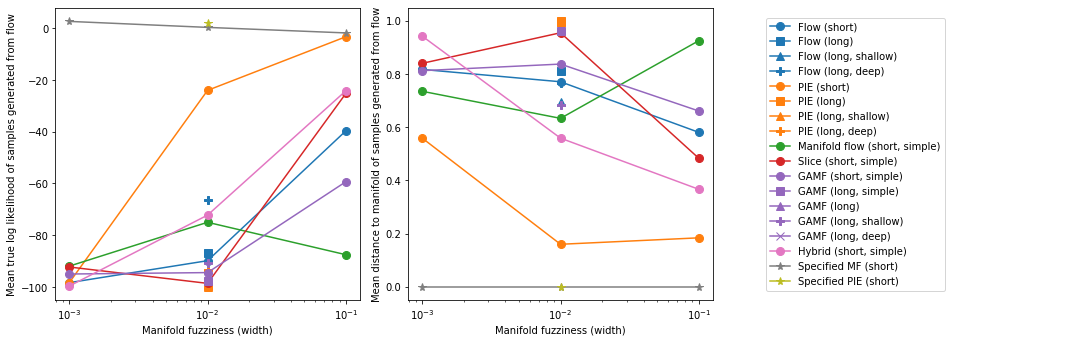

In [53]:
show = [1, 0, 2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,3,1)
for mean_logp_gen_, algo_label, c, algo_marker in zip(mean_logp_gen, algo_labels, algo_colors, algo_markers):
    print(algo_label, mean_logp_gen_[show])
    plt.plot(xs, mean_logp_gen_[show], label=algo_label, ls="-", marker=algo_marker, ms=8., c=c)
# plt.legend()
plt.xscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("Mean true log likelihood of samples generated from flow")

ax = plt.subplot(1,3,2)
for mean_distance_gen_, algo_label, c, algo_marker in zip(mean_distance_gen, algo_labels, algo_colors, algo_markers):
    plt.plot(xs, mean_distance_gen_[show], label=algo_label, ls="-", marker=algo_marker, ms=8, c=c)
#plt.legend()
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("Mean distance to manifold of samples generated from flow")

ax = plt.subplot(1,3,3)
plt.legend()
for mean_logp_gen_, algo_label, c, algo_marker in zip(mean_logp_gen, algo_labels, algo_colors, algo_markers):
    plt.plot([], [], label=algo_label, ls="-", marker=algo_marker, ms=8., c=c)
plt.legend(loc="center left")
plt.axis("off")

plt.tight_layout()
plt.savefig("../figures/distance_likelihood_vs_epsilon_spherical_gaussian.pdf")
